In [4]:
import tensorflow as tf

tf.__version__

'2.5.0'

# Keras를 사용한 개발 과정
1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 훈련 데이터를 정의
2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 네트워크(모델)을 정의
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    
3. 모델 컴파일
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
4. Training(훈련)
    - 모델의 fit() 메소드에 훈련데이터(X,y)를 넣어 Train.
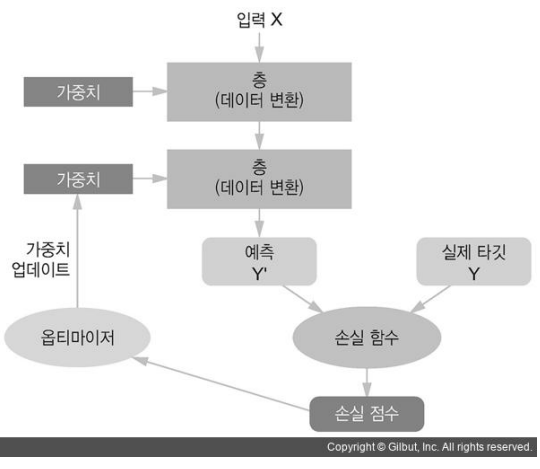

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.5.0'

In [11]:
keras.__version__

'2.5.0'

In [13]:
# MNIST Dataset을 loading - keras의 toy dataset으로 제공
# (train data), (test data)
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [15]:
type(train_image), type(train_label)

(numpy.ndarray, numpy.ndarray)

In [16]:
print(train_image.shape, train_label.shape)
# train_image: (이미지개수, height, width)
# train_label: (정답개수, )

(60000, 28, 28) (60000,)


In [17]:
print(test_image.shape, test_label.shape)

(10000, 28, 28) (10000,)


In [19]:
train_image.dtype

dtype('uint8')

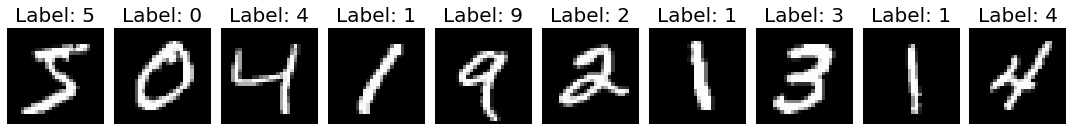

In [21]:
# 10개 이미지를 확인
import matplotlib.pyplot  as plt
plt.figure(figsize=(15,5))
for idx in range(10):
    plt.subplot(1,10,idx+1)
    plt.imshow(train_image[idx], cmap='gray')
    plt.title(f"Label: {train_label[idx]}", fontsize=20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

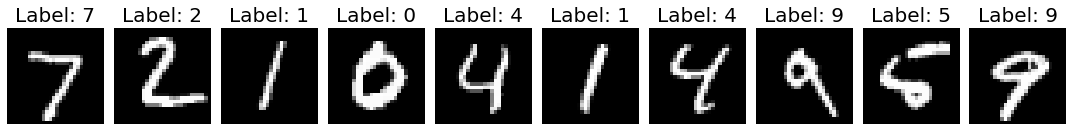

In [22]:
# 10개 이미지를 확인
import matplotlib.pyplot  as plt
plt.figure(figsize=(15,5))
for idx in range(10):
    plt.subplot(1,10,idx+1)
    plt.imshow(test_image[idx], cmap='gray')
    plt.title(f"Label: {test_label[idx]}", fontsize=20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## 신경망 구현

## network : 전체 모델 구조 만들기

In [26]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [31]:
# 모델(네트워크)
model = keras.Sequential()
# 모델에 Layer들을 추가
model.add(keras.layers.InputLayer((28,28)))  #첫번째 Layer는 Input Layer (입력데이터의 shape)
model.add(keras.layers.Flatten()) # 28 x 28 입력데이터를 1차원 배열(784,)로 변환
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))

model.add(keras.layers.Dense(units=10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## 컴파일 단계
- 구축된 모델에 학습을 위한 추가 설정
- 손실함수
- Optimizer(최적화 함수)
- 평가지표

In [35]:
model.compile(optimizer="adam", #최적화함수-모델의 파라미터(weight)들을 업데이트
              loss="categorical_crossentropy", # Loss(손실,오차)를 계산하는 함수설정. categorical_crossentropy: 다중분류의 손실함수
              metrics=['accuracy']
             )

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다. (Scaling)
- y (Output Data)
    - one hot encoding 처리
        - Label이 다중분류일 경우 One Hot Encoding 한다.
    - tensorflow.keras 의 to_categorical() 함수 이용

In [39]:
np.min(train_image), np.max(train_image), train_image.dtype

(0, 255, dtype('uint8'))

In [44]:
X_train = (train_image/255.0).astype(np.float32)

In [42]:
X_test = (test_image/255.0).astype(np.float32)

In [45]:
np.min(X_train), np.max(X_train), X_train.dtype

(0.0, 1.0, dtype('float32'))

In [47]:
train_label, np.unique(train_label)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [52]:
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [48]:
# label onehot encoding
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [51]:
print(y_train.shape, train_label.shape)
y_train[:5]

(60000, 10) (60000,)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 학습 (fit)

In [54]:
# 1 epoch: train dataset 전체를 한번 학습하는 것.
# 1 step : 파라미터(weight)를 한번 update
model.fit(X_train, y_train, # train dataset - x, y
          epochs=10,  #epoch 수 - train dataset을 몇번 학습할지 지정.
          batch_size=100, #파라미터(weight-모델의 학습대상)를 몇개의 데이터마다 업데이트할지 설정. - 
          validation_split=0.3 #train set의 30%는 검증 데이터셋으로 사용.
         )
# 학습 데이터: 60000개, batch_size: 100
# 1 epoch당   600 step

Epoch 1/10
420/420 [==============================] - 3s 7ms/step - loss: 0.3665 - accuracy: 0.8971 - val_loss: 0.1980 - val_accuracy: 0.9427
Epoch 2/10
420/420 [==============================] - 2s 4ms/step - loss: 0.1499 - accuracy: 0.9555 - val_loss: 0.1420 - val_accuracy: 0.9581
Epoch 3/10
420/420 [==============================] - 2s 4ms/step - loss: 0.1023 - accuracy: 0.9700 - val_loss: 0.1237 - val_accuracy: 0.9637
Epoch 4/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0787 - accuracy: 0.9757 - val_loss: 0.1099 - val_accuracy: 0.9667
Epoch 5/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0616 - accuracy: 0.9812 - val_loss: 0.1046 - val_accuracy: 0.9690
Epoch 6/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0989 - val_accuracy: 0.9706
Epoch 7/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.0985 - val_accuracy: 0.9723
Epoch 

## 테스트셋 평가

### 추론 메소드
- predict()
    - 각 클래스 별 확률 반환
- <del>predict_classes()</del>
    - 클래스(범주값) 반환
    - tensorflow 2.3 부터 deprecated 됨
- 이진 분류(binary classification)
    - `numpy.argmax(model.predict(x) > 0.5).astype("int32")`
- 다중클래스 분류(multi-class classification)
    - `numpy.argmax(model.predict(x), axis=-1)`
-     